In [199]:
import numpy as np
import cv2
import ImageView as iv
import eksplisitt as eks
import matplotlib.pyplot as plt
%matplotlib inline

lena = 'lena.png'
LFC = 'LFC.jpeg'

def toRGB(image): #open CV laster bilder i BGR. Konverterer til RGB
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #returnerer bildet konvertert til RGB

def anon(ROI):
    im = ROI
    im = im.astype(dtype=float) / 255
    gray_im = np.sum(im.astype(float), 2) / (3 * 255)  #gråtone trengs for å vise masken
    im0 = np.copy(im)
    im[im < 0] = 0                   # klipp til lovlige verdier
    im[im > 1] = 1
    
    mask = np.ones(gray_im.shape)     #lag maske
    mask = mask.astype(bool)          #lag bool-array
    
    im = eks.eksplisitt(im, alpha=0.25, h=0, n=1000)     #løs
    im[mask] = im0[mask]              #ja
    
    return im
    
def detectFace(file, title):
    """
    Oppdager et ansikt vendt mot kamera
   
    Parameters
    ---------
    file         : Bildefil
                    Pathen til filen der original bildet befinner seg uten andvending
    scaleFactor  : int
                    Kompenserer i tilfelle noen ansikter er nærmere kamera enn andre
    minNeighbors : int
                    spesifiserer antall naboer en rektangel bør ha for å bli kalt et "ansikt"
    title        : text
                    Tittelen på bildet som er anvendt
    """
    image = cv2.imread(file) #leser inn bildet
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #importerer haarscade biblioteket
    faces = face_cascade.detectMultiScale(image, scaleFactor = 1.5, minNeighbors = 5, minSize = (30,30))
    
    for (x,y,w,h) in faces:
        ROI = image[y:y+h ,x:x+w]                       #Region of Interest --> ansiktet                                              #blurrer området som er definert som ansikt
        image[y:y+h ,x:x+w] = anon(ROI)                 #Anonymiserer ROI
    
    print("Antall ansikt er", len(faces))               #teller opp antall ansikt funnet og skriver de ut
        
    iv.singleView(toRGB(image),title)                   #displayer bildet

Antall ansikt er 1


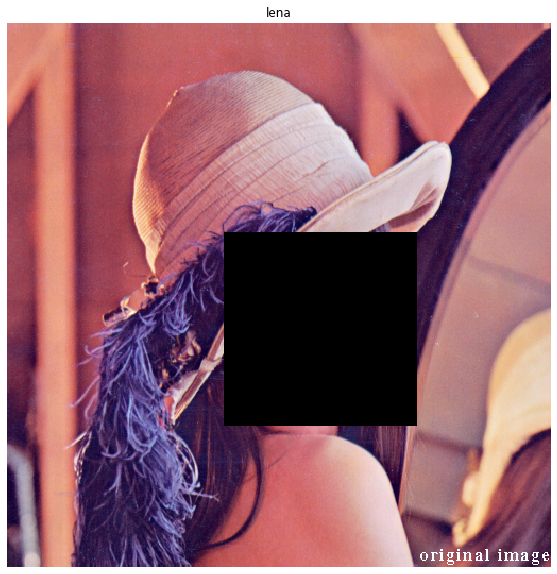

In [200]:
detectFace(lena, "lena")

Antall ansikt er 5


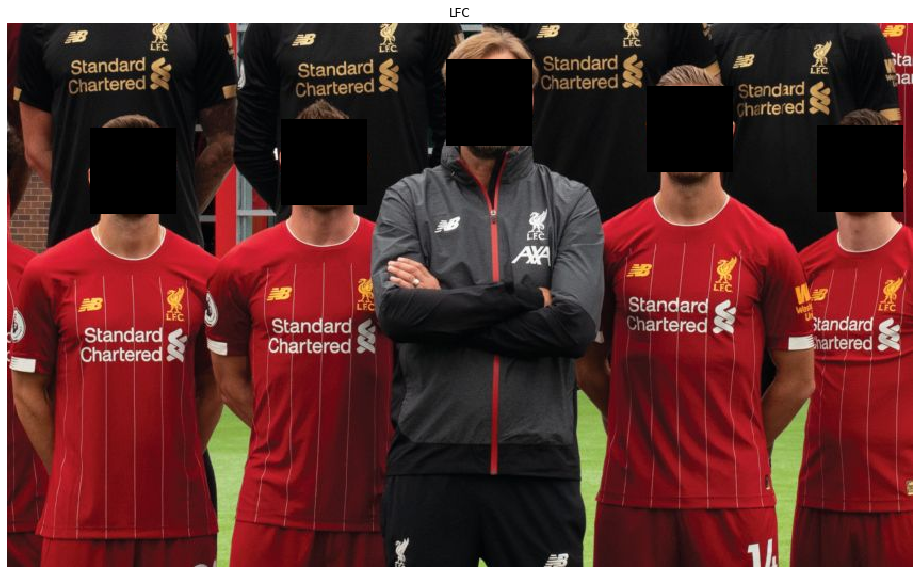

In [201]:
detectFace(LFC, "LFC")